In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [7]:
img=cv2.imread("images/diploma.jpg")

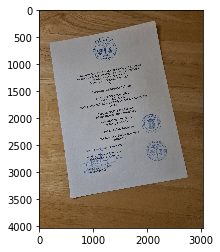

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

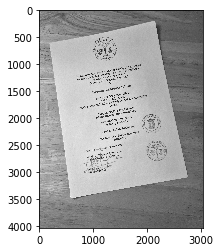

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [8]:
def resize(img, height=800):
    """ Resize image to given height """
    rat = height / img.shape[0]
    return cv2.resize(img, (int(rat * img.shape[1]), height))

# Resize and convert to grayscale
img = cv2.cvtColor(resize(img), cv2.COLOR_BGR2GRAY)

# Bilateral filter preserv edges
img = cv2.bilateralFilter(img, 9, 75, 75)

# Create black and white image based on adaptive threshold
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 4)

# Median filter clears small details
img = cv2.medianBlur(img, 11)

# Add black border in case that page is touching an image border
img = cv2.copyMakeBorder(img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=[0, 0, 0])

edges = cv2.Canny(img, 200, 250)






# Getting contours  
im2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Finding contour of biggest rectangle
# Otherwise return corners of original image
# Don't forget on our 5px border!
height = edges.shape[0]
width = edges.shape[1]
MAX_COUNTOUR_AREA = (width - 10) * (height - 10)

# Page fill at least half of image, then saving max area found
maxAreaFound = MAX_COUNTOUR_AREA * 0.5

# Saving page contour
pageContour = np.array([[5, 5], [5, height-5], [width-5, heigh-5], [widt-5, 5]])

# Go through all contours
for cnt in contours:
    # Simplify contour
    perimeter = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.03 * perimeter, True)

    # Page has 4 corners and it is convex
    # Page area must be bigger than maxAreaFound 
    if (len(approx) == 4 and
            cv2.isContourConvex(approx) and
            maxAreaFound < cv2.contourArea(approx) < MAX_COUNTOUR_AREA):

        maxAreaFound = cv2.contourArea(approx)
        pageContour = approx

# Result in pageConoutr (numpy array of 4 points):

ValueError: not enough values to unpack (expected 3, got 2)

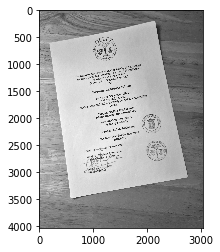

In [7]:
#blur image

gray=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(gray,cmap='gray')

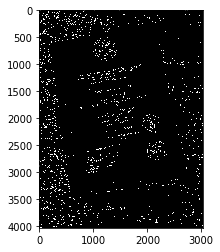

In [8]:
edged=cv2.Canny(gray,20,30)

plt.imshow(edged,cmap='gray')


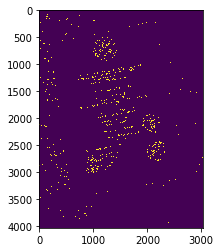

In [24]:
cnts=cv2.findContours(edged.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

In [29]:
def biggestRectangle(contours):
    biggest = None
    max_area = 0
    indexReturn = -1
    for index in range(len(contours)):
            i = contours[index]
            area = cv2.contourArea(i)
            if area > 100:
                    peri = cv2.arcLength(i,True)
                    approx = cv2.approxPolyDP(i,0.1*peri,True)
                    if area > max_area: #and len(approx)==4:
                            biggest = approx
                            max_area = area
                            indexReturn = index
    return indexReturn

In [31]:
indexReturn = biggestRectangle(cnts)

In [32]:
cv2.drawContours(img, cnts, indexReturn, (0,255,0))

        
#cv2.drawContours(img,[screenCnt],-1,(0,255,0),2)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

array([[[ 29,  81, 121],
        [ 32,  84, 124],
        [ 32,  83, 123],
        ...,
        [  6,  51,  85],
        [  5,  48,  81],
        [  1,  45,  76]],

       [[ 28,  80, 120],
        [ 31,  83, 123],
        [ 32,  83, 123],
        ...,
        [  4,  47,  80],
        [  4,  48,  79],
        [  1,  45,  76]],

       [[ 29,  81, 118],
        [ 31,  83, 120],
        [ 33,  82, 120],
        ...,
        [  3,  46,  79],
        [  6,  47,  79],
        [  5,  45,  74]],

       ...,

       [[ 27,  76, 116],
        [ 27,  76, 116],
        [ 29,  78, 118],
        ...,
        [ 27,  63,  87],
        [ 31,  62,  87],
        [ 37,  68,  93]],

       [[ 25,  77, 114],
        [ 26,  78, 115],
        [ 30,  79, 119],
        ...,
        [ 28,  63,  89],
        [ 31,  62,  87],
        [ 40,  70,  95]],

       [[ 23,  75, 112],
        [ 25,  77, 114],
        [ 30,  79, 119],
        ...,
        [ 28,  63,  89],
        [ 32,  63,  88],
        [ 42,  72,  97]]

In [28]:
screenCnt

array([[[ 283, 4030]],

       [[ 284, 4029]],

       [[ 285, 4030]],

       [[ 284, 4031]]], dtype=int32)